<a href="https://colab.research.google.com/github/BrunoFNoob/Projeto_Energia/blob/main/projeto_energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importações Iniciais para leitura dos CSV's

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce



### Importação de todos os CSV's e Análise dos dados gerais

In [ ]:
# Todos os CSV's à serem lidos:
todos_csv = [r'c:\Users\bruno\Downloads\GERACAO_USINA_2000.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2001.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2002.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2003.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2004.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2005.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2006.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2007.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2008.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2009.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2010.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2011.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2012.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2013.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2014.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2015.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2016.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2017.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2018.csv',r'c:\Users\bruno\Downloads\GERACAO_USINA_2019.csv',
                r'c:\Users\bruno\Downloads\GERACAO_USINA_2020.csv']

# Transformando em Dataframe
dataframes = [pd.read_csv(arquivo, delimiter=";") for arquivo in todos_csv]

# Transfomando a coluna 'din_instante' em DateTime e as colunas Object restantes em String.
for df in dataframes:
    df['din_instante'] = pd.to_datetime(df['din_instante'])
    for coluna in df.columns:
        if df[coluna].dtype == 'object':
            df[coluna] = df[coluna].astype('string')

# Concatenando os Dataframes
df_final = pd.concat(dataframes, ignore_index=True)

# Salvando o Dataframe
df_final.to_csv("arquivo_conct.csv", index=False)


In [ ]:
df_final.info()
#DICIONARIO DE DADOS : 'din_instante' Tem que ser Datetime, 'val_geracao' tem que ser float e o resto Texto.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54335427 entries, 0 to 54335426
Data columns (total 12 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   din_instante            datetime64[ns]
 1   id_subsistema           string        
 2   nom_subsistema          string        
 3   id_estado               string        
 4   nom_estado              string        
 5   cod_modalidadeoperacao  string        
 6   nom_tipousina           string        
 7   nom_tipocombustivel     string        
 8   nom_usina               string        
 9   ceg                     string        
 10  val_geracao             float64       
 11  id_ons                  string        
dtypes: datetime64[ns](1), float64(1), string(10)
memory usage: 4.9 GB


In [ ]:
df_final.isnull().sum()
#DICIONARIO DE DADOS : Apenas  'cod_modalidadeoperacao' e 'ceg' permitem valor NULO.

din_instante                     0
id_subsistema                    0
nom_subsistema                   0
id_estado                        0
nom_estado                       0
cod_modalidadeoperacao          24
nom_tipousina                    0
nom_tipocombustivel              0
nom_usina                        0
ceg                              0
val_geracao                 164361
id_ons                    48399748
dtype: int64

In [ ]:
nulos_vg = df_final['val_geracao'].isnull().sum()
valor_total = len(df_final)
percentual_nulos = (nulos_vg/valor_total)*100
print('Percentual de valores nulos nos valores de geração = ', round(percentual_nulos,1) , "%")


Percentual de valores nulos nos valores de geração =  0.3 %


In [ ]:
nulos_Id = df_final['id_ons'].isnull().sum()
valor_total = len(df_final)
percentual_nulos = (nulos_Id/valor_total)*100
print('Percentual de valores nulos nos Ids = ', round(percentual_nulos,1) , "%")


Percentual de valores nulos nos valores de geração =  89.1 %


### Escolha da Ideia.

O Ceará é apontado como quarto maior produtor de energia eólica do país, onde a produção de energia eólica mais do que dobra no Ceará no segundo semestre de todos os anos. Analisemos.

fontes:
- https://www.estadao.com.br/economia/energia-eolica-ranking-estados-brasil-veja-nprei/
- https://focus.jor.br/ceara-e-o-4o-maior-produtor-de-energia-eolica-do-pais-diz-aneel/
- https://g1.globo.com/ce/ceara/noticia/2023/08/16/apontado-como-possivel-local-de-origem-do-apagao-ceara-tem-boom-na-geracao-de-energia-no-mes-de-agosto.ghtml#:~:text=A%20produ%C3%A7%C3%A3o%20de%20energia%20e%C3%B3lica,compara%C3%A7%C3%A3o%20com%20o%20primeiro%20semestre.

### Quanto a geração eólica :

In [ ]:
eolica = df_final[df_final['nom_tipocombustivel'] == 'Eólica']

In [ ]:
eolica = eolica.groupby('id_estado')['val_geracao'].sum()

In [ ]:
eolica
#Ceará fica em terceiro lugar em geração eólica nesse dataset!!!

id_estado
BA    6.546469e+07
CE    3.725195e+07
MA    4.912331e+06
PE    1.321311e+07
PI    2.583410e+07
RN    8.054264e+07
RS    3.580932e+07
SC    2.295898e+06
Name: val_geracao, dtype: float64

### análise do segundos semestres do ceará

In [ ]:
df_CE = df_final[df_final['id_estado']=='CE']
# Criação do DF próprio do Ceará

In [ ]:
df_CE.nom_tipocombustivel.value_counts()
#Eólica em destaque

nom_tipocombustivel
Eólica                  1592525
Óleo Diesel             1308671
Gás                      312864
Carvão                   142907
Óleo Combustível          88120
Resíduos Industriais      39381
Fotovoltaica              35807
Name: count, dtype: Int64

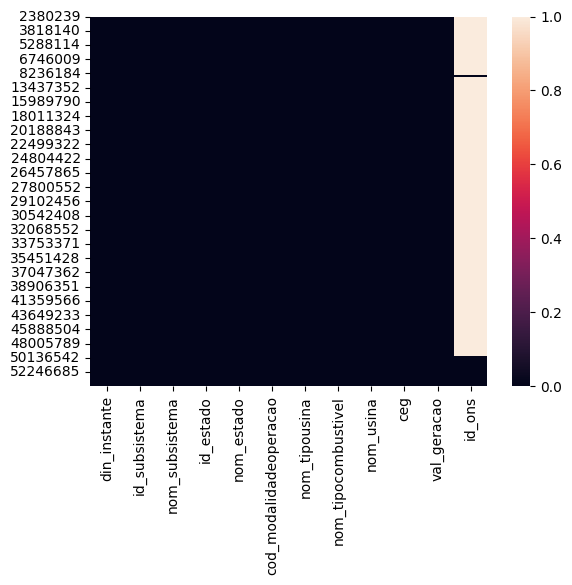

In [ ]:
sns.heatmap(df_CE.isnull());
# Percebe-se que o estado do Ceará tem apenas valores nulos nos id_ons

In [ ]:
df_CE.val_geracao.value_counts()

val_geracao
0.0000      1611493
7.0000         4257
5.0000         3593
4.0000         3156
0.9700         2807
             ...   
8.1648            1
332.8100          1
20.1336           1
37.6808           1
182.5480          1
Name: count, Length: 262095, dtype: int64

### Encodar para visualizar as correlações

In [ ]:
import category_encoders as ce
#utilização de um encoder que lida com valores nulos presentes.
encodar = ce.OrdinalEncoder()
str_encodado = encodar.fit_transform(df_CE[['id_subsistema', 'nom_subsistema', 'id_estado', 'nom_estado', 'cod_modalidadeoperacao', 'nom_tipousina', 'nom_tipocombustivel', 'nom_usina', 'ceg', 'id_ons']])
# encodando as colunas str

In [ ]:
colunas = ['id_subsistema', 'nom_subsistema', 'id_estado', 'nom_estado', 'cod_modalidadeoperacao', 'nom_tipousina', 'nom_tipocombustivel', 'nom_usina', 'ceg', 'id_ons']
df_CE = df_CE.drop(colunas, axis=1)
#dropando as já presentes

In [ ]:
df_CE = pd.concat([df_CE, str_encodado], axis=1)
#concatenação dos encodados com df central

In [ ]:
df_CE.head()
# Agora não temos mais str, podendo fazer a correlação

,din_instante,val_geracao,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipocombustivel,nom_usina,ceg,id_ons
2380239,2002-04-16 00:00:00,0.0,1,1,1,1,1,1,1,1,1,34
2380240,2002-04-16 00:00:00,0.0,1,1,1,1,2,1,1,2,2,34
2380380,2002-04-16 01:00:00,0.0,1,1,1,1,1,1,1,1,1,34
2380381,2002-04-16 01:00:00,0.0,1,1,1,1,2,1,1,2,2,34
2380521,2002-04-16 02:00:00,0.0,1,1,1,1,2,1,1,2,2,34


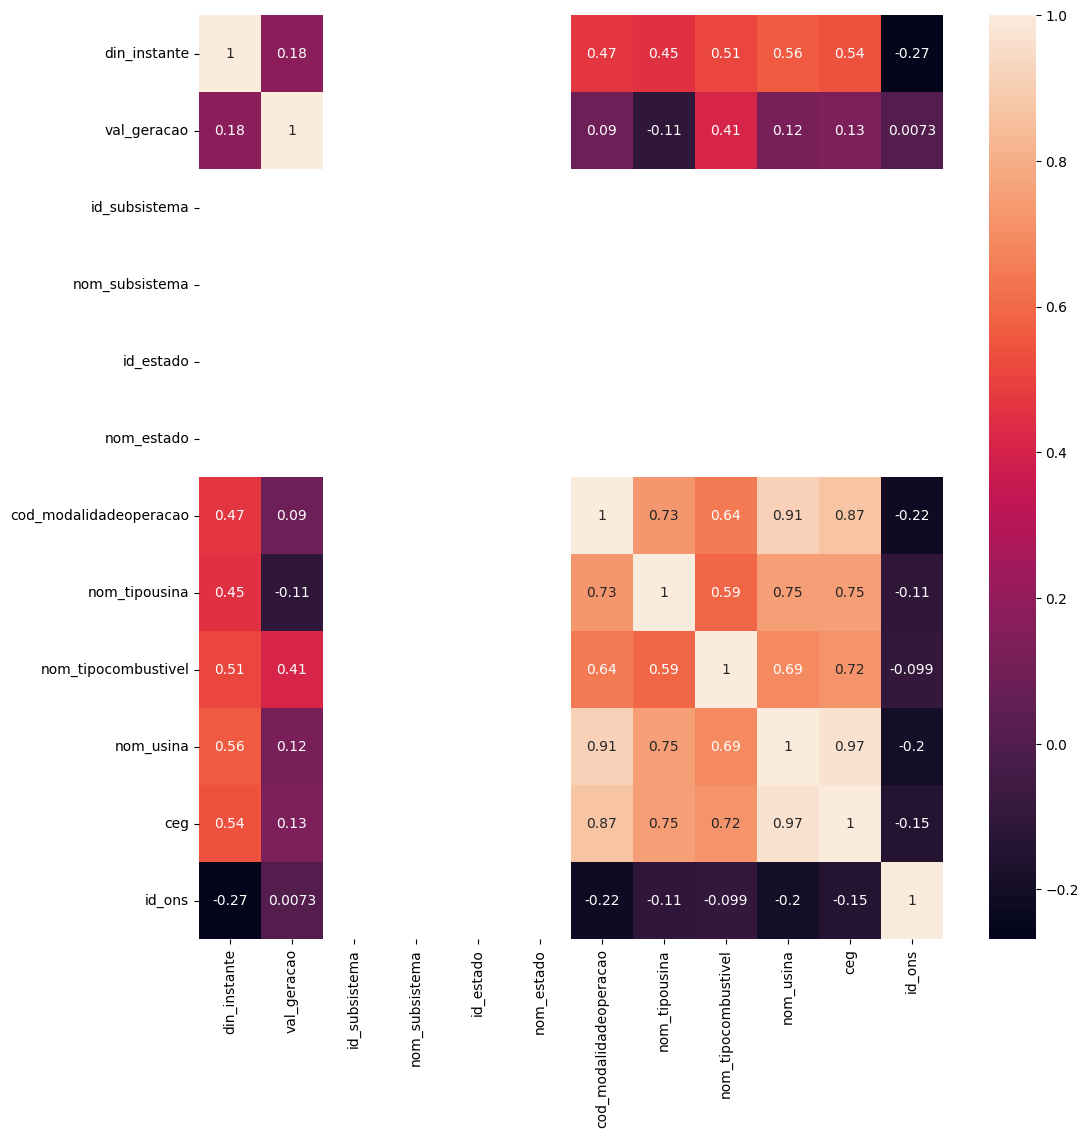

In [ ]:
correlacao = df_CE.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlacao, annot = True);
#Podemos dropar as 4 colunas em branco, pois essas tem sempre o mesmo valor, já que sempre é no Ceará,
# que sempre será no nordete.

In [ ]:
colunas = ['id_subsistema', 'nom_subsistema', 'id_estado', 'nom_estado']
df_CE = df_CE.drop(colunas, axis=1)
# retirando as colunas que não agregam.

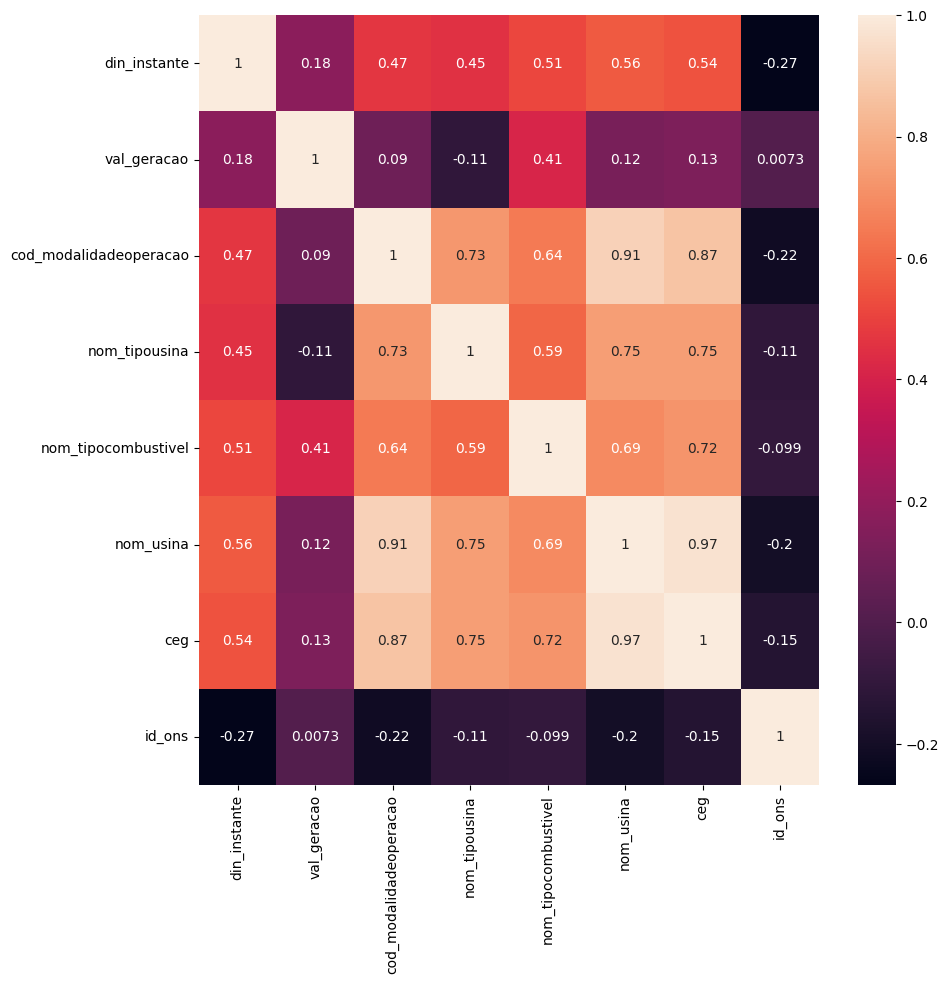

In [ ]:
correlacao = df_CE.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlacao, annot = True);
#Quanto ao valor da geração, podemos ver uma correlação fraca, mas existente entre esse índice e o tipo de combustível
# 0.3 a 0.5 positivo indica uma correlação fraca

In [ ]:
# Documento BOOTCAMP : Apesar da granularidade horária dos dados, o modelo deve focar em previsões na frequência mensal.
#df_CE['Ano'] = pd.DatetimeIndex(df_CE['din_instante']).year
df_CE['Mes'] = pd.DatetimeIndex(df_CE['din_instante']).month
#df_CE['Dia'] = pd.DatetimeIndex(df_CE['din_instante']).day

Text(0.5, 1.0, 'Geração de Energia por mês')

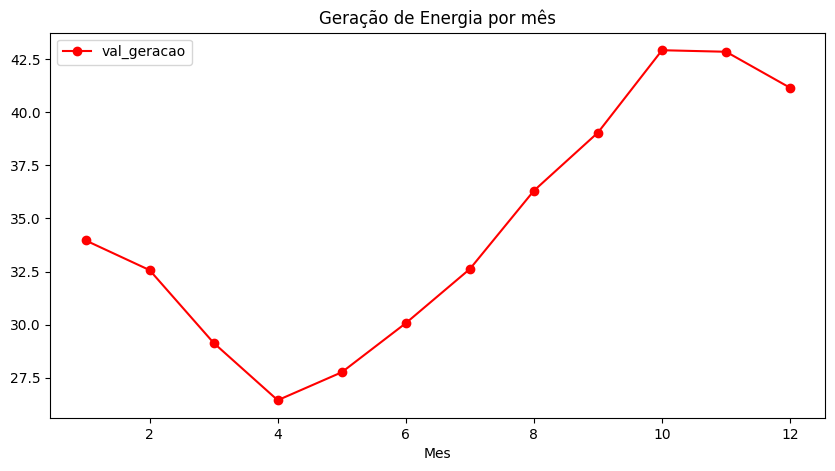

In [ ]:
axis = df_CE.groupby('Mes')[['val_geracao']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Geração de Energia por mês')
# a produção de energia eólica mais do que dobra no Ceará no segundo semestre de todos os anos

Text(0.5, 1.0, 'Geração de Energia por Ano')

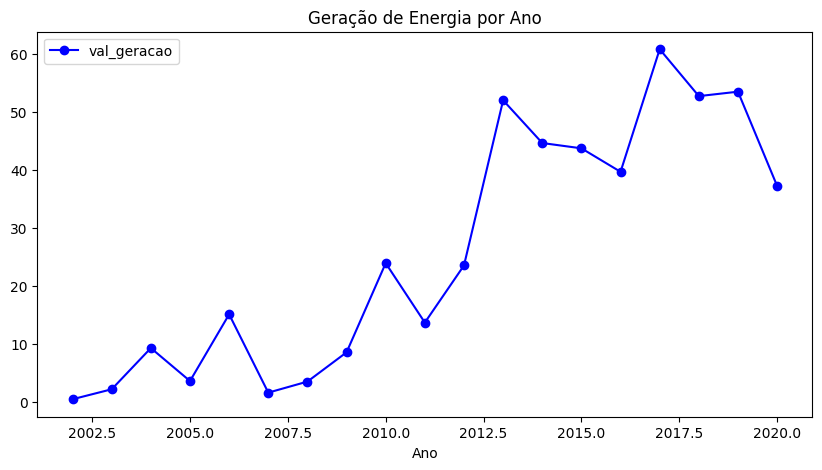

In [ ]:
axis = df_CE.groupby('Ano')[['val_geracao']].mean().plot(figsize = (10,5), marker = 'o', color = 'b')
axis.set_title('Geração de Energia por Ano')
#primeira visualização anual da geração de energia total no ceará

### Utilização do Prophet para predição.

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objects as go
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
dataset = df_CE[['din_instante', 'val_geracao']].rename(columns = {'din_instante': 'ds', 'val_geracao': 'y'})
# renomeando para a forma pedida do sistema.

In [ ]:
dataset = dataset.sort_values(by = 'ds')
# ordenando a lista pela data,

In [ ]:
dataset = dataset[dataset['ds'] < '2019-01-01 00:00:00']
#apenas até o fim de 2018.

In [ ]:
model = Prophet()
model.fit(dataset)
# chamando o Prophet e fitando na base de dados escolhida.

12:02:30 - cmdstanpy - INFO - Chain [1] start processing
12:39:31 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Transformando em mensal
futuro = model.make_future_dataframe(periods=24, freq='ME')
previsao = model.predict(futuro)
#definindo a previsão

In [ ]:
futuro.tail()
# está mensal

,ds
146210,2020-08-31 23:00:00
146211,2020-09-30 23:00:00
146212,2020-10-31 23:00:00
146213,2020-11-30 23:00:00
146214,2020-12-31 23:00:00


c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:397: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:401: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

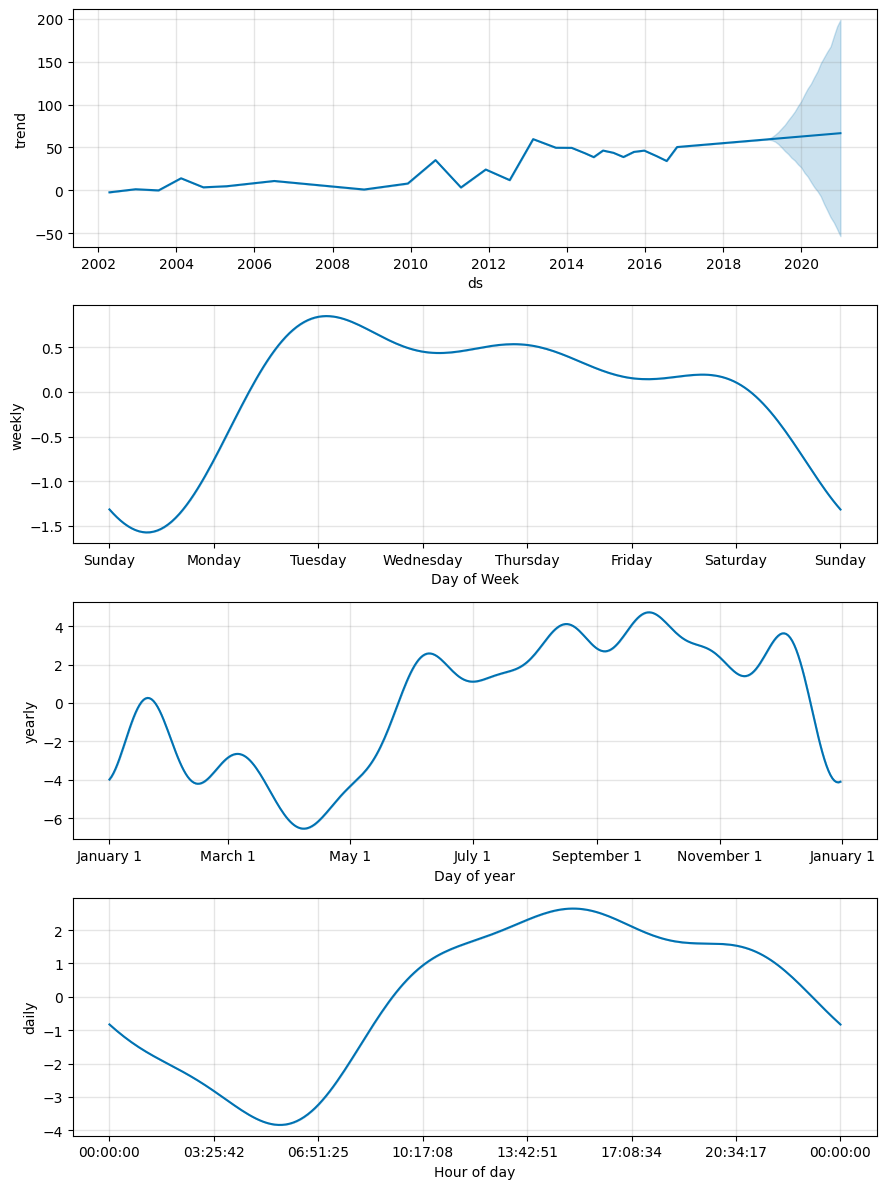

In [ ]:
model.plot_components(previsao);
#chamando gráfico.

## Analisando :
### - Primeiro :
     De fato há um avanço enorme na produção de energia no segundo semestre do Ceará
### - Segundo :
     Nessa data, o Ceará não está em quarto na produção de energia eólica, mas em terceiro.
### - Terceiro :
     A previsão demonstra números próximos ao da realidade, mostrado em 19 e 20.